# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Created by ANH TRAN (015621450)  
Last updated: 3/1/2026

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

In [2]:
pokemon = pd.read_csv(fp)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
Results: There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values.

Text(0.5, 1.0, 'Relationship between Attack and Defense')

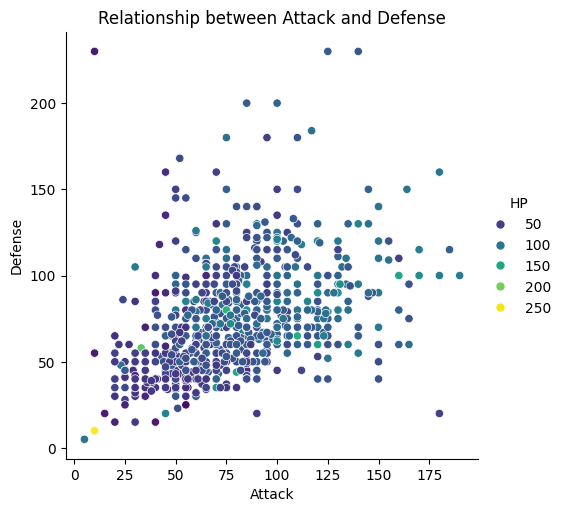

In [4]:
# Your code here . . .
sns.relplot(data=pokemon, x = "Attack", y = "Defense",hue = "HP", palette = "viridis")
plt.title("Relationship between Attack and Defense")

QUESTION 1 RESULT: There is a positive correlation between Attack and Defense because pokemon with higher attacks tends to have higher defense as seen by the majority of points appearing to be increasing linearly. In addition, higher attack and defense seems to have a result in pokemon with higher HP because a majority of pokemon around 25-60 for attack and defense have 50 HP; however, for majority ofpokemons with 75-175 for both attack and defense seems to have around 100-200 HP.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

Text(0.5, 0.98, 'Attack vs total for all Pokemon')

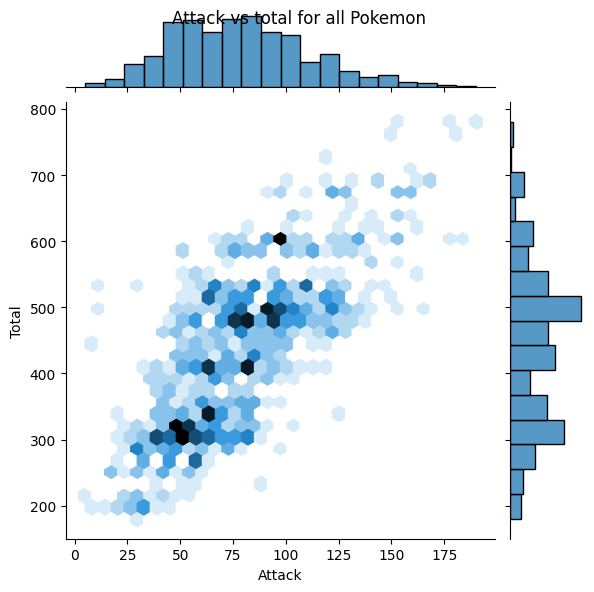

In [5]:
# Your code here . . .
attack_to_total = sns.jointplot(
    data = pokemon,
    x = "Attack",
    y = "Total",
    kind = "hex",
    gridsize = 30
)
attack_to_total.fig.suptitle("Attack vs total for all Pokemon")

QUESTION 2 ANSWER: Besides showing the relationship between Attack and Total with the density of Pokemon across Attacks and Total values, the hexbin plot also shows the distribution of the x values, which is Attack and the distribution of Total, which is the y values. This way, we can see where the majority/distrubition of Attack and Total values are with its down indepdent bar graphs. which allows us to see the spread of each variable by itself.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

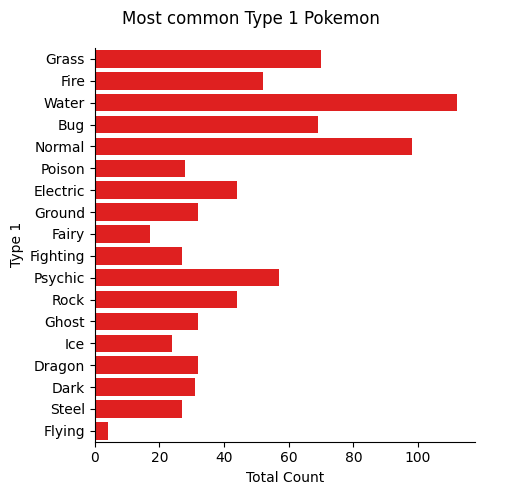

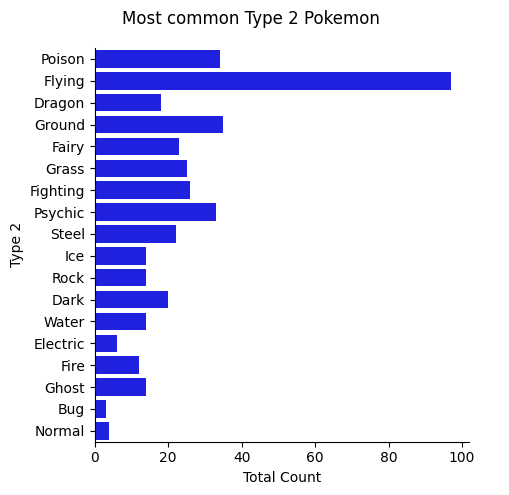

In [6]:
type_1_category = sns.catplot(
    data = pokemon,
    y = "Type 1",
    kind = "count",
    color = "red"
).set_axis_labels("Total Count", "Type 1")
type_1_category.fig.suptitle("Most common Type 1 Pokemon")
type_1_category.tight_layout()

type_2_category = sns.catplot(
    data = pokemon,
    y = "Type 2",
    kind = "count",
    color = "blue"
).set_axis_labels("Total Count", "Type 2")
type_2_category.fig.suptitle("Most common Type 2 Pokemon")
type_2_category.tight_layout()

type_1_category
type_2_category

QUESTION 3 ANSWER: The most common type 1 is Water with roughly 120 counts and the most rare type 1 is Flying with roughly 5 counts. As for Type 2, the most common type 2 is Flying with around 100 counts while the most rare type 2 is Bug with around 3 counts.

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

Question 4: What are the spread of legendary to non legendary for each types in Type 1 pokemon, and how does the attacks and HP of legendary pokemons compare to non legendary pokemons.

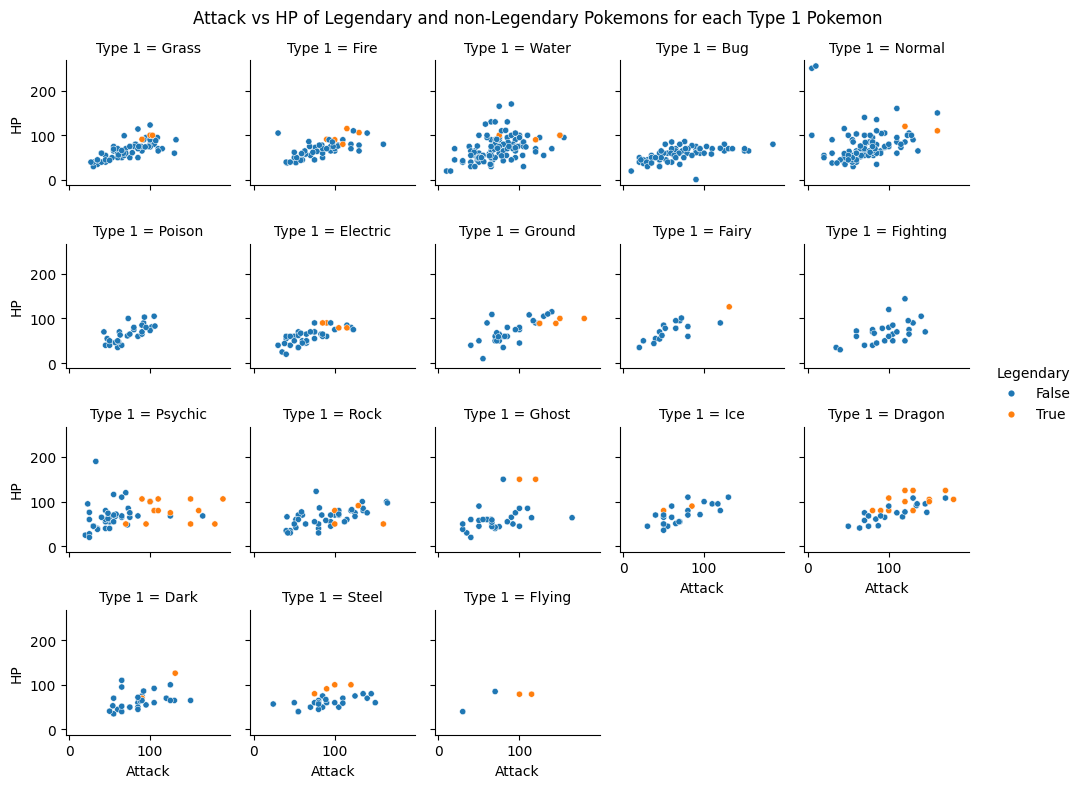

In [14]:
g = sns.relplot(
    data = pokemon,
    x = "Attack",
    y = "HP",
    hue = "Legendary",
    col = "Type 1",
    col_wrap=5,
    height = 2,
    s = 20
)
g.fig.suptitle("Attack vs HP of Legendary and non-Legendary Pokemons for each Type 1 Pokemon")
g.tight_layout()

QUESTION 4 ANSWER: Based on the multiple plots for each type in Type 1 pokemon, the spread of legendary to non legendary pokemons differ significantly for each type of pokemon. However, the most notable plots is the Type 1 Bug pokemon, where there are no legendary pokemon; however, for Type 1 Psychic and Dragon pokemons, the plots shows a relatively somewhat even spread between legendary and non legendary pokemons. Another noticible graph is the Type 1 Flying pokemon where there are only 4 flying pokemons, but two of them are considered as legendary. Furthermore, a common characteristics between all the plots for each type is that there are no legendary pokemon that have both the lowest HP and Attack compared to non legendary pokemon, which means that legendary pokemon are relatively better in stats when it comes to HP and Attack as compared to most other pokemon of the same type.

Question 5: What are the distribution and correlation of Speed between Legendary and Non Legendary Pokemon for Type 1 Psychic and Dragon? 

Text(0.5, 0.98, 'Distribution of Speed for Legendary and non-Legendary Type 1 Psychic and Dragon Pokemons')

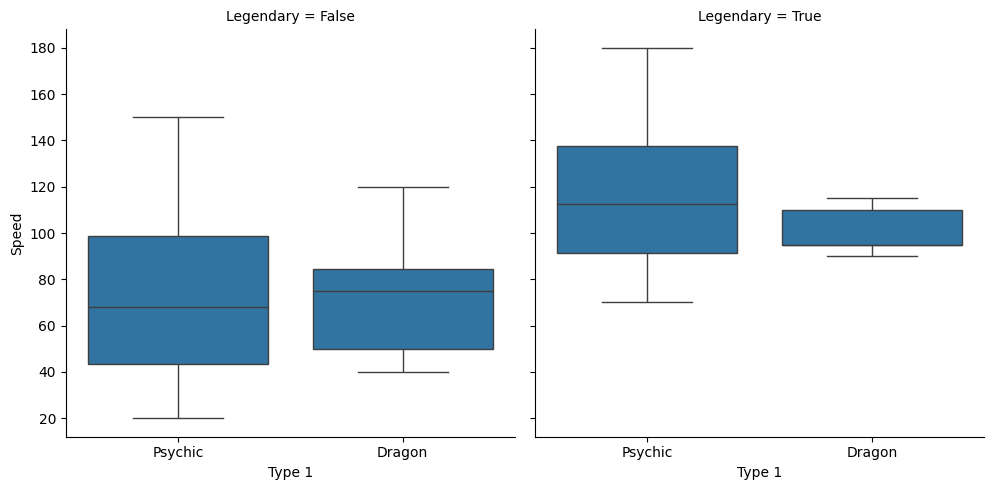

In [25]:
type_1_pokemon = pokemon[
    (pokemon["Type 1"].isin(["Psychic", "Dragon"]))
]

sns.catplot(
    data = type_1_pokemon,
    x = "Type 1",
    y = "Speed",
    kind = "box",
    col = "Legendary",

)
g.fig.suptitle("Distribution of Speed for Legendary and non-Legendary Type 1 Psychic and Dragon Pokemons")


Question 5 Answer: Based on the two plots, one for legendary and the other for non legendary, we can see that for both Psychic and Dragon pokemons, the interquartile range for both legendary types are higher than the interquartile range for the non legendary types. Therefore, I can assume that by just looking at Psychic and Dragon type 1 pokemon, legendary pokemons have a higher overall speed as compared to non legendary pokemons of the same types. This may also be true with other pokemon types that was not directly plot where lengendary pokemons have higher speed than non legendary pokemons.

Question 6: What is the Distribution of all Total Stats for all Type 1 pokemon, and which type 1 pokemon has the lowest and highest stats?

Text(0.5, 1.0, 'Distribution of Total Stats for each Type 1 Pokemon')

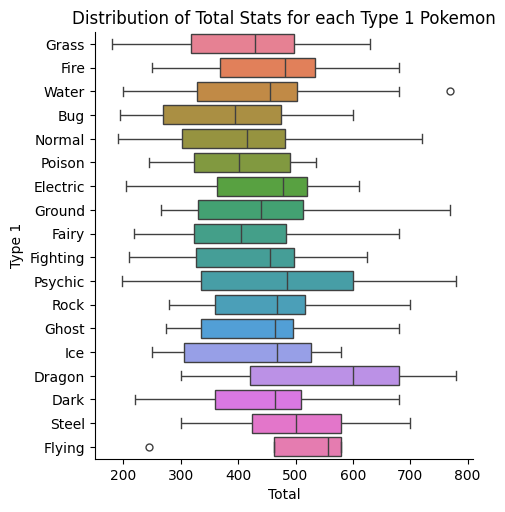

In [17]:
sns.catplot(
    data = pokemon,
    x = "Total",
    y = "Type 1",
    kind = "box",
    hue = "Type 1"
)
plt.title("Distribution of Total Stats for each Type 1 Pokemon")

Question 6 Answer: Based on the plot of the distribution of Total Stats for each Type 1 pokemon, we can see that the highest distribution for the best total stats goes to Dragon Type while the lowest distribution goes to Bug Type pokemons. Based on my knowledge of the Pokemon world and games, Dragon type, followed by Psychic type are some of the strongest pokemon type. On the other hand, Bug type pokemon are known to be the weakest. Therefore, by looking at the distribution of total stats for every type, we can see that Dragon and Psychic types pokemon have the first and second best distribution of total stats while Bug type has the lowest. 